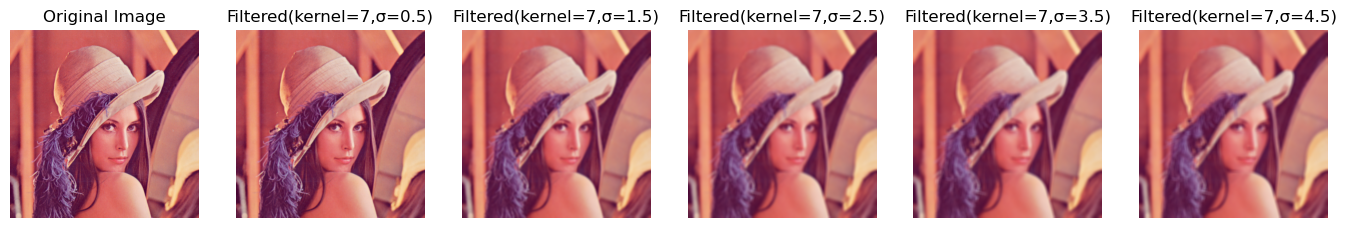

In [1]:
import cv2
import time
import matplotlib.pyplot as plt
import PIL
import numpy as np

# Load the image in grayscale
start = time.perf_counter()
image = PIL.Image.open("../images/Lenna.png")

k = 7
sigma = 0.5
j = 2

plt.figure(figsize=(17,15))

for i in range(5):
    # Apply Gaussian Blur reference
    
    blurred_image = cv2.GaussianBlur(np.array(image), (k, k), sigmaX=sigma,borderType=cv2.BORDER_DEFAULT)  # Adjust kernel size and sigma as needed

    plt.subplot(1,6,j)
    plt.title(f"Filtered(kernel={k},σ={sigma})")
    plt.imshow(blurred_image)
    plt.axis('off')

    j += 1
    sigma += 1
    


plt.subplot(1,6,1)
plt.title(f"Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()


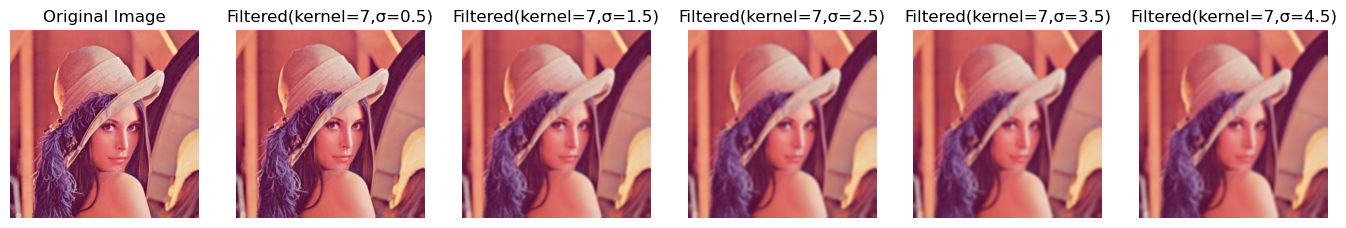

In [2]:
#gaussian blur manual basic
from gaussian_filter_basic import apply_gaussian_filter

k = 7
sigma = 0.5
j = 2

image = PIL.Image.open("../images/Lenna.png")


plt.figure(figsize=(17,15))

for i in range(5):

    filtered_image =  apply_gaussian_filter(np.array(image),k,sigma)

    plt.subplot(1,6,j)
    plt.title(f"Filtered(kernel={k},σ={sigma})")
    plt.imshow(np.clip(filtered_image,0,255).astype(np.uint8))
    plt.axis('off')

    j += 1
    sigma += 1

plt.subplot(1,6,1)
plt.title(f"Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()



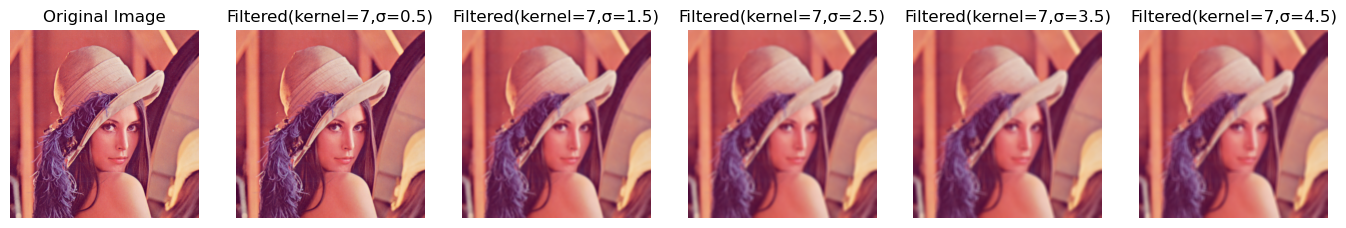

In [3]:
#gaussian blur basic numpy
from gaussian_filter_basic_numpy import apply_gaussian_filter

k = 7
sigma = 0.5
j = 2

image = PIL.Image.open("../images/Lenna.png")

plt.figure(figsize=(17,15))


for i in range(5):

    filtered_image =  apply_gaussian_filter(np.array(image),k,sigma)

    plt.subplot(1,6,j)
    plt.title(f"Filtered(kernel={k},σ={sigma})")
    plt.imshow(np.clip(filtered_image,0,255).astype(np.uint8))
    plt.axis('off')

    j += 1
    sigma += 1

plt.subplot(1,6,1)
plt.title(f"Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()

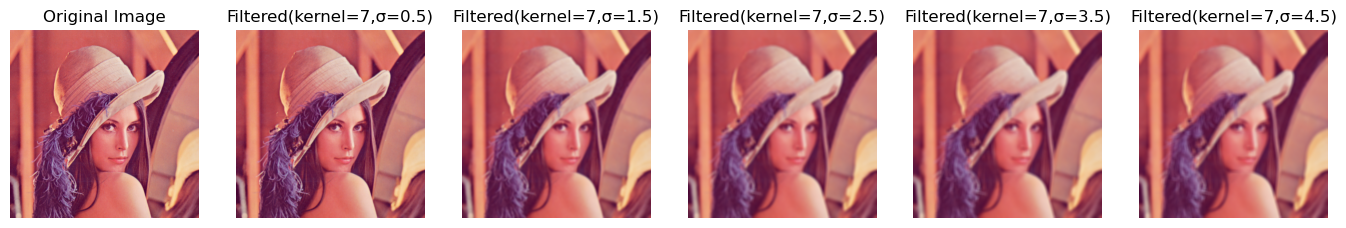

In [4]:
#gaussian blur manual using convolve2d
from gaussian_filter_fast import apply_gaussian_filter_fast

k = 7
sigma = 0.5
j = 2

image = PIL.Image.open("../images/Lenna.png")

plt.figure(figsize=(17,15))

for i in range(5):

    filtered_image =  apply_gaussian_filter_fast(np.array(image),k,sigma)

    plt.subplot(1,6,j)
    plt.title(f"Filtered(kernel={k},σ={sigma})")
    plt.imshow(np.clip(filtered_image,0,255).astype(np.uint8))
    plt.axis('off')

    j += 1
    sigma += 1

plt.subplot(1,6,1)
plt.title(f"Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()


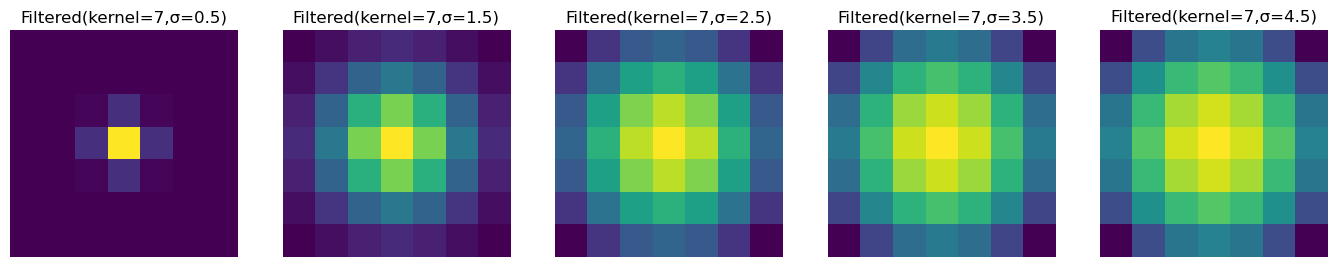

In [5]:
#plotting kernels
from gaussian_filter_basic import create_gaussian_kernel
k = 7
sigma = 0.5
j = 1
plt.figure(figsize=(17,15))

for i in range(5):
    kernel =  create_gaussian_kernel(k,sigma)

    plt.subplot(1,5,j)
    plt.title(f"Filtered(kernel={k},σ={sigma})")
    plt.imshow(kernel, cmap="viridis")
    plt.axis('off')

    j += 1
    sigma += 1

plt.show()



In [15]:
from memory_profiler import memory_usage
import gaussian_filter_basic_numpy
import gaussian_filter_basic
import math

def performance_test(image, implementations, kernel_size, sigma,reference_image):
    results = []
    
    for name, func in implementations:
        if name != "Reference":
            print(f"Testing {name}...")
            
            # Measure memory usage and execution time
            start_time = time.time()
            mem_usage = memory_usage((func, (np.array(image), kernel_size, sigma)), interval=0.1, max_usage=True)
            end_time = time.time()
            
            # Calculate execution time
            execution_time = end_time - start_time
            
            # Calculate accuracy metrics: MSE, PSNR, SSIM
            mse_value = mean_squared_error(reference_image, blurred_image)
            psnr_value = peak_signal_to_noise_ratio(reference_image, blurred_image)
            
            # Store the results for each implementation
            results.append({
                "Implementation": name,
                "Execution Time (s)": execution_time,
                "Memory Usage (MB)": mem_usage,
                "MSE": mse_value,
                "PSNR (dB)": psnr_value,
            })
        else:
            print(f"Testing {name}...")
            
            # Measure memory usage and execution time
            start_time = time.time()
            mem_usage = memory_usage((func, (np.array(image),(k,k),sigma)), interval=0.1, max_usage=True)
            end_time = time.time()
            
            # Calculate execution time
            execution_time = end_time - start_time
            
            # Store the results for each implementation
            results.append({
                "Implementation": name,
                "Execution Time (s)": execution_time,
                "Memory Usage (MB)": mem_usage
            })
    
    # Print results
    print("\nPerformance Test Results:")
    for result in results:
        print(result)

# Calculate Mean Squared Error (MSE)
def mean_squared_error(image1, image2):
    return np.mean((image1 - image2) ** 2)

# Calculate Peak Signal-to-Noise Ratio (PSNR)
def peak_signal_to_noise_ratio(image1, image2):
    mse_value = mean_squared_error(image1, image2)
    if mse_value == 0:
        return float('inf')
    max_pixel_value = 255.0  # Assuming 8-bit images
    return 20 * math.log10(max_pixel_value / math.sqrt(mse_value))


implementations = [("Reference",cv2.GaussianBlur),("Basic", gaussian_filter_basic.apply_gaussian_filter),("Basic (Numpy)", gaussian_filter_basic_numpy.apply_gaussian_filter),("Convolution", apply_gaussian_filter_fast)]

reference_image = cv2.GaussianBlur(np.array(PIL.Image.open('../images/Lenna.png')).astype(np.uint8), (5, 5), 1.5) 

#SD image
performance_test(np.array(image),implementations,5,1.5,reference_image)




Testing Reference...
Testing Basic...
Testing Basic (Numpy)...
Testing Convolution...

Performance Test Results:
{'Implementation': 'Reference', 'Execution Time (s)': 3.4750211238861084, 'Memory Usage (MB)': 177.38671875}
{'Implementation': 'Basic', 'Execution Time (s)': 7.099121570587158, 'Memory Usage (MB)': 179.8828125, 'MSE': 17.3905081114172, 'PSNR (dB)': 35.72768089574748}
{'Implementation': 'Basic (Numpy)', 'Execution Time (s)': 2.8488917350769043, 'Memory Usage (MB)': 178.63671875, 'MSE': 17.3905081114172, 'PSNR (dB)': 35.72768089574748}
{'Implementation': 'Convolution', 'Execution Time (s)': 2.6308703422546387, 'Memory Usage (MB)': 181.95703125, 'MSE': 17.3905081114172, 'PSNR (dB)': 35.72768089574748}


In [18]:
def performance_test(image, implementations, kernel_size, sigma,reference_image):
    results = []
    
    for name, func in implementations:
        if name != "Reference":
            print(f"Testing {name}...")
            
            # Measure memory usage and execution time
            start_time = time.time()
            mem_usage = memory_usage((func, (np.array(image), kernel_size, sigma)), interval=0.1, max_usage=True)
            end_time = time.time()
            
            # Calculate execution time
            execution_time = end_time - start_time
            
            # Store the results for each implementation
            results.append({
                "Implementation": name,
                "Execution Time (s)": execution_time,
                "Memory Usage (MB)": mem_usage,
            })
        else:
            print(f"Testing {name}...")
            
            # Measure memory usage and execution time
            start_time = time.time()
            mem_usage = memory_usage((func, (np.array(image),(k,k),sigma)), interval=0.1, max_usage=True)
            end_time = time.time()
            
            # Calculate execution time
            execution_time = end_time - start_time
            
            # Store the results for each implementation
            results.append({
                "Implementation": name,
                "Execution Time (s)": execution_time,
                "Memory Usage (MB)": mem_usage
            })
    
    # Print results
    print("\nPerformance Test Results:")
    for result in results:
        print(result)

image = PIL.Image.open('../images/ImageHD.jpg')
reference_image = cv2.GaussianBlur(np.array(PIL.Image.open('../images/ImageHD.jpg')).astype(np.uint8), (5, 5), 1.5) 

#HD image
performance_test(np.array(image),implementations,5,1.5,reference_image)

Testing Reference...
Testing Basic...
Testing Basic (Numpy)...
Testing Convolution...

Performance Test Results:
{'Implementation': 'Reference', 'Execution Time (s)': 3.4477434158325195, 'Memory Usage (MB)': 372.51953125}
{'Implementation': 'Basic', 'Execution Time (s)': 226.56371474266052, 'Memory Usage (MB)': 435.796875}
{'Implementation': 'Basic (Numpy)', 'Execution Time (s)': 68.18639135360718, 'Memory Usage (MB)': 397.140625}
{'Implementation': 'Convolution', 'Execution Time (s)': 1.467437744140625, 'Memory Usage (MB)': 458.07421875}


In [19]:
image = PIL.Image.open('../images/ImageFHD.jpg')
reference_image = cv2.GaussianBlur(np.array(PIL.Image.open('../images/ImageFHD.jpg')).astype(np.uint8), (5, 5), 1.5) 

#FHD image
performance_test(np.array(image),implementations,5,1.5,reference_image)

Testing Reference...
Testing Basic...
Testing Basic (Numpy)...
Testing Convolution...

Performance Test Results:
{'Implementation': 'Reference', 'Execution Time (s)': 3.4686717987060547, 'Memory Usage (MB)': 346.875}
{'Implementation': 'Basic', 'Execution Time (s)': 150.3326132297516, 'Memory Usage (MB)': 389.09375}
{'Implementation': 'Basic (Numpy)', 'Execution Time (s)': 45.59813570976257, 'Memory Usage (MB)': 363.3046875}
{'Implementation': 'Convolution', 'Execution Time (s)': 1.2301788330078125, 'Memory Usage (MB)': 398.4609375}


In [22]:
image = PIL.Image.open('../images/image4K.jpeg')
reference_image = cv2.GaussianBlur(np.array(PIL.Image.open('../images/image4K.jpeg')).astype(np.uint8), (5, 5), 1.5) 

#4K image
performance_test(np.array(image),implementations,5,1.5,reference_image)

Testing Reference...
Testing Basic...
Testing Basic (Numpy)...
Testing Convolution...

Performance Test Results:
{'Implementation': 'Reference', 'Execution Time (s)': 3.4825439453125, 'Memory Usage (MB)': 680.125}
{'Implementation': 'Basic', 'Execution Time (s)': 1226.1059057712555, 'Memory Usage (MB)': 947.30078125}
{'Implementation': 'Basic (Numpy)', 'Execution Time (s)': 363.11138105392456, 'Memory Usage (MB)': 653.58984375}
{'Implementation': 'Convolution', 'Execution Time (s)': 4.297711372375488, 'Memory Usage (MB)': 1319.86328125}
